### Example: GMM for Generating New Data

• We just saw a simple example of using GMM as a generative model of data in order to create new samples from the distribution defined by the input data.

• Here we will run with this idea and generate new handwritten digits from the standard digits corpus that we have used before.

• To start with, let's load the digits data using Scikit-Learn's data tools:

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

• Let's begin with the standard imports:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

• Next let's plot the first 100 of these to recall exactly what we're looking at:

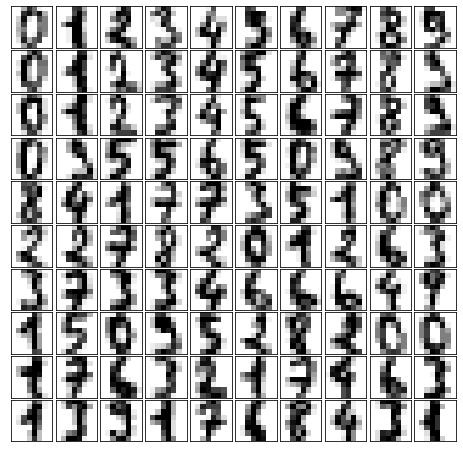

In [4]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

• We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more.

• GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data.

• Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

• The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss.

• Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

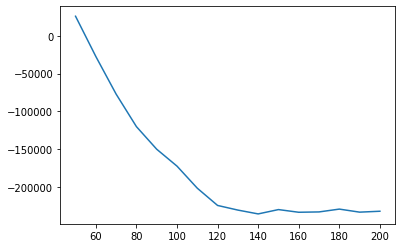

In [7]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

• It appears that around 110 components minimizes the AIC; we will use this model.

• Let's quickly fit this to the data and confirm that it has converged:

In [14]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


• Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [13]:
data_new, _ = gmm.sample(100)
data_new.shape

(100, 41)

• Finally, we can use the inverse transform of the PCA object to construct the new digits:

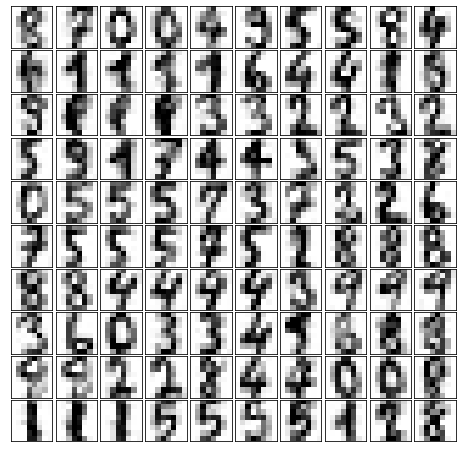

In [15]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

• The results for the most part look like plausible digits from the dataset!

• Consider what we've done here: given a sampling of handwritten digits, we have modeled the distribution of that data in such a way that we can generate brand new samples of digits from the data: these are "handwritten digits" which do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.

• Such a generative model of digits can prove very useful as a component of a Bayesian generative classifier, as we shall see in the next section.